In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import statsmodels.graphics.tsaplots as sgt
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
df=df[['Date','BTC_close']]
df=df[::-1]
df.index = df.Date
df.index = pd.to_datetime(df.Date)
df.drop(columns = ['Date'], inplace = True)
df

,BTC_close
Date,
2016-03-10,415.8
2016-03-11,419.1
2016-03-12,410.4
2016-03-13,412.4
2016-03-14,414.3
...,...
2023-06-18,26339.7
2023-06-19,26845.9
2023-06-20,28307.7


In [5]:
df["BTC_close"].describe

<bound method NDFrame.describe of Date
2016-03-10      415.8
2016-03-11      419.1
2016-03-12      410.4
2016-03-13      412.4
2016-03-14      414.3
               ...   
2023-06-18    26339.7
2023-06-19    26845.9
2023-06-20    28307.7
2023-06-21    29996.9
2023-06-22    29890.5
Name: BTC_close, Length: 2661, dtype: float64>

In [6]:
n=int(len(df)*0.75)
train=df[:n]
test=df[n:]


In [7]:
print(len(train),len(test))

1995 666


In [8]:
train

,BTC_close
Date,
2016-03-10,415.8
2016-03-11,419.1
2016-03-12,410.4
2016-03-13,412.4
2016-03-14,414.3
...,...
2021-08-21,48875.8
2021-08-22,49254.5
2021-08-23,49539.7


In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6729818945979429
n_lags: 0.4450840078776362
p-value: 0.4450840078776362
Critial Values:
   1%, -3.4328369639536587
Critial Values:
   5%, -2.8626387516878955
Critial Values:
   10%, -2.567354903970076


P>0.05 ==> The series is not stationary

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

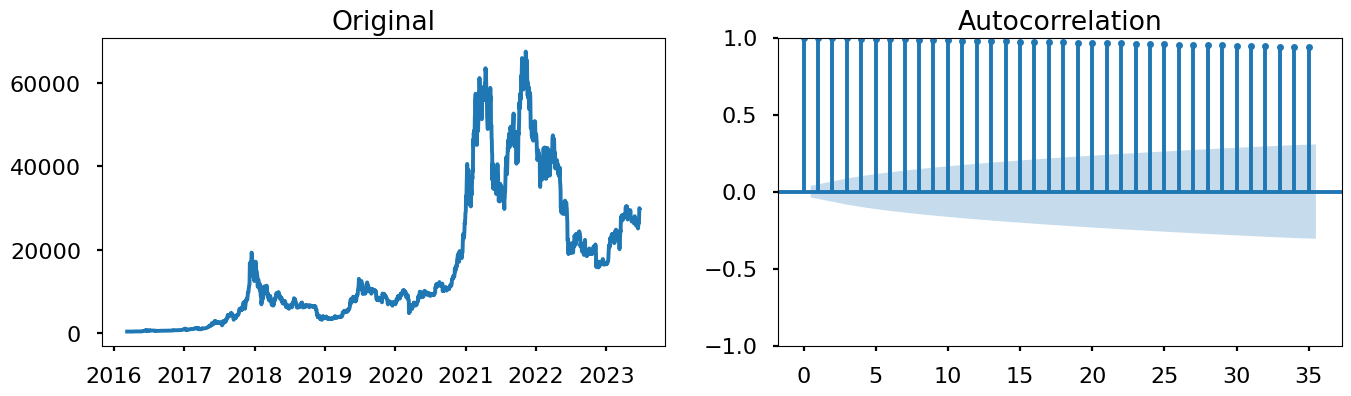

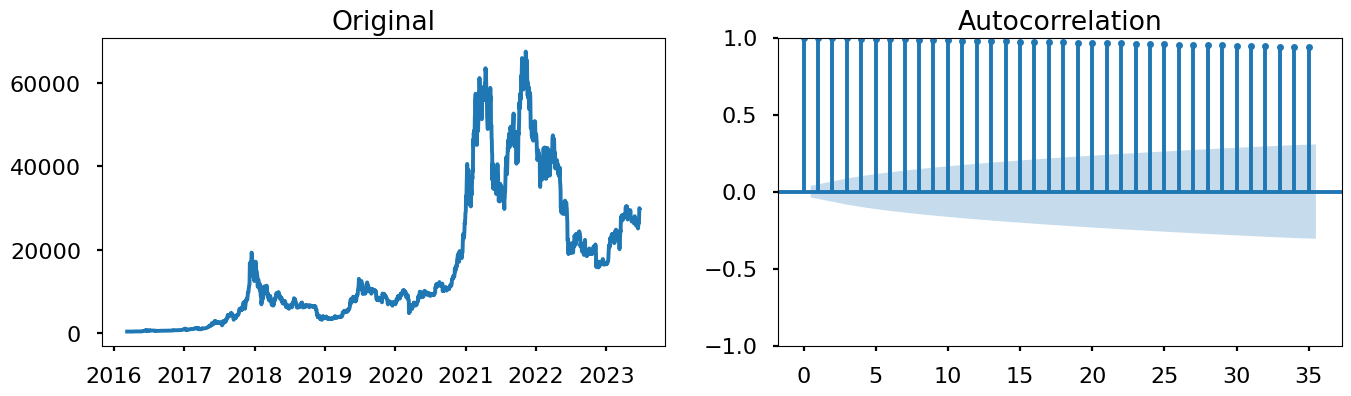

In [11]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df)
ax1.set_title("Original")

# Adjusting x-axis tick labels


plot_acf(df, ax=ax2)



In [12]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.2 MB/s eta 0:00:00


In [13]:
from pmdarima.arima.utils import ndiffs

In [14]:
ndiffs(df,test="adf")

1

d=1

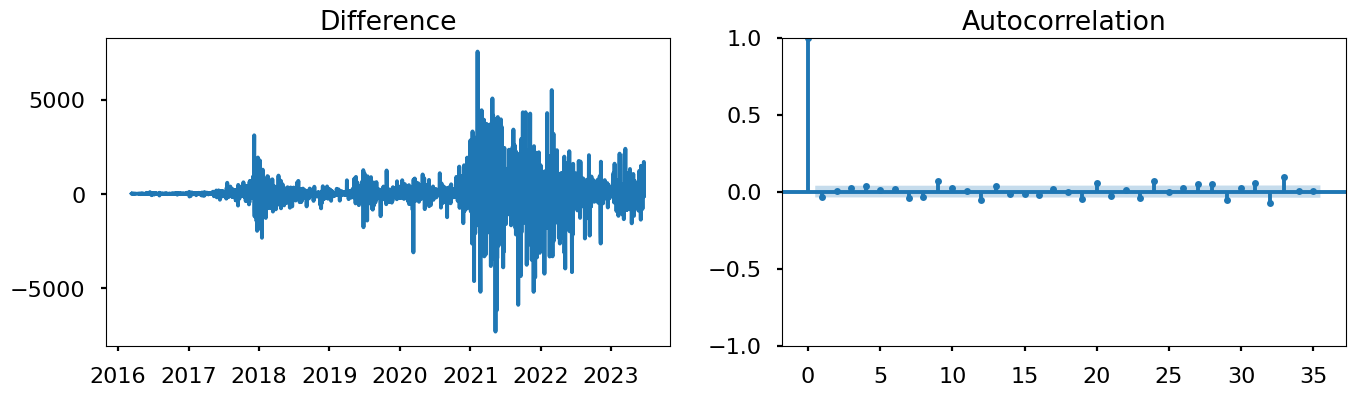

In [15]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference")
# Adjusting x-axis tick labels

plot_acf(diff,ax=ax2);

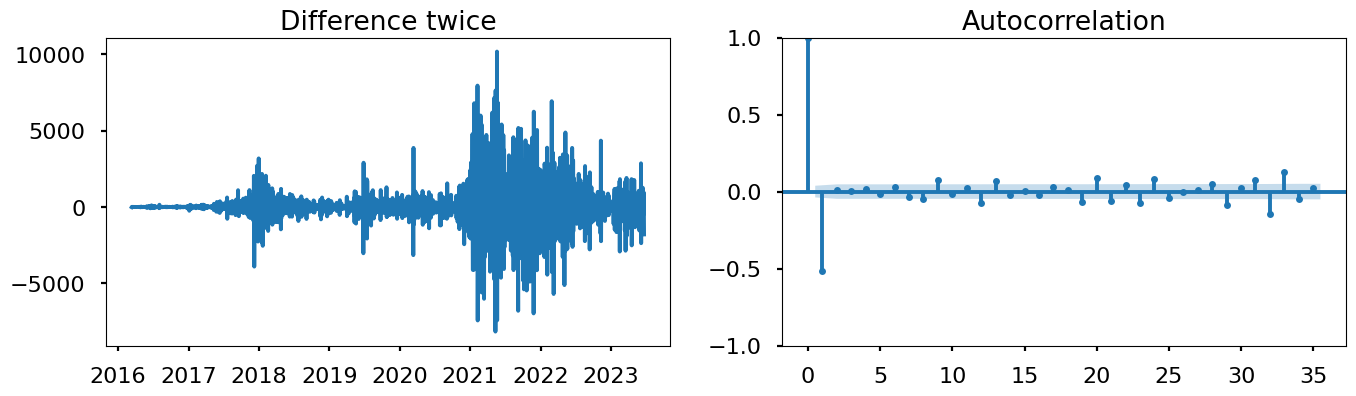

In [16]:
diff=df.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
# Adjusting x-axis tick labels

plot_acf(diff,ax=ax2);

 After differencing once we can see that our returns are randomly distributed around the mean of zero.If we diffence them twice we have not much differents compared to difference once.But in second of the differencing the lag go into the far negative compared to first order of differencing so that may indicate that the series might have been over differenced.Therefore,we will choose our order of differencing as one

In [17]:
start_index = len(train)
end_index = len(train)+len(test)-1

We can also use pmdarima package to get number of differencing

In [18]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from pmdarima.arima.utils import ndiffs

In [20]:
ndiffs(df,test="adf")

1

We get the  same results as we analyze the acf plot

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

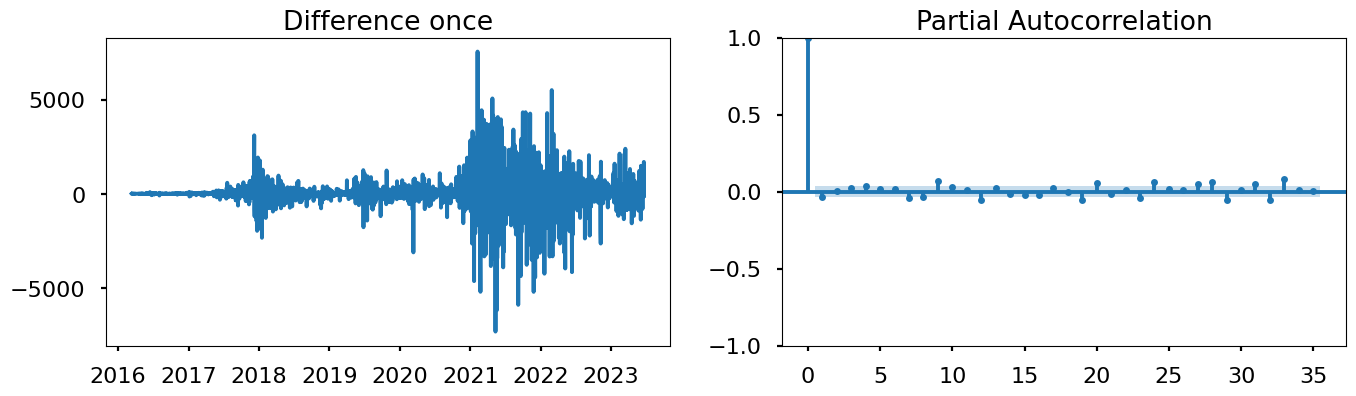

In [22]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
# Adjusting x-axis tick labels
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

We can observe that the Lag 9 is significant as it is above the significance line THen we choose p=9

In [23]:
import statsmodels.api as sm

In [24]:
model = sm.tsa.arima.ARIMA(train, order=(9, 1,3))
model = model.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BTC_close   No. Observations:                 1995
Model:                 ARIMA(9, 1, 3)   Log Likelihood              -15986.058
Date:                Mon, 26 Jun 2023   AIC                          31998.116
Time:                        20:35:12   BIC                          32070.889
Sample:                    03-10-2016   HQIC                         32024.841
                         - 08-25-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4182      0.090     -4.633      0.000      -0.595      -0.241
ar.L2         -0.5830      0.031    -18.787      0.000      -0.644      -0.522
ar.L3         -0.7016      0.079     -8.883      0.000      -0.856      -0.547
ar.L4          0.0407      0.016      2.529      0.011       0.009       0.072
ar.L5          0.0847      0.014      6.086      0.000       0.057       0.112
ar.L6          0.0889      0.015      5.800      0.000       0.059       0.119
ar.L7          0.0322      0.012      2.794      0.005       0.010       0.055
ar.L8         -0.0407      0.012     -3.362      0.001      -0.064      -0.017
ar.L9          0.0309      0.011      2.801      0.005       0.009       0.053
ma.L1          0.3547      0.089      3.983      0.000       0.180       0.529
ma.L2          0.6536      0.035     18.460      0.000       0.584       0.723
ma.L3          0.7544      0.088      8.612      0.000       0.583       0.926
sigma2      5.523e+05   5918.196     93.325      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             42537.64
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              15.62   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
train_pred = model.fittedvalues
train_pred


Date
2016-03-10        0.000000
2016-03-11      406.663389
2016-03-12      429.293421
2016-03-13      417.894746
2016-03-14      415.904213
                  ...     
2021-08-21    48750.807650
2021-08-22    49090.572137
2021-08-23    49542.470140
2021-08-24    49989.790528
2021-08-25    47764.123672
Length: 1995, dtype: float64

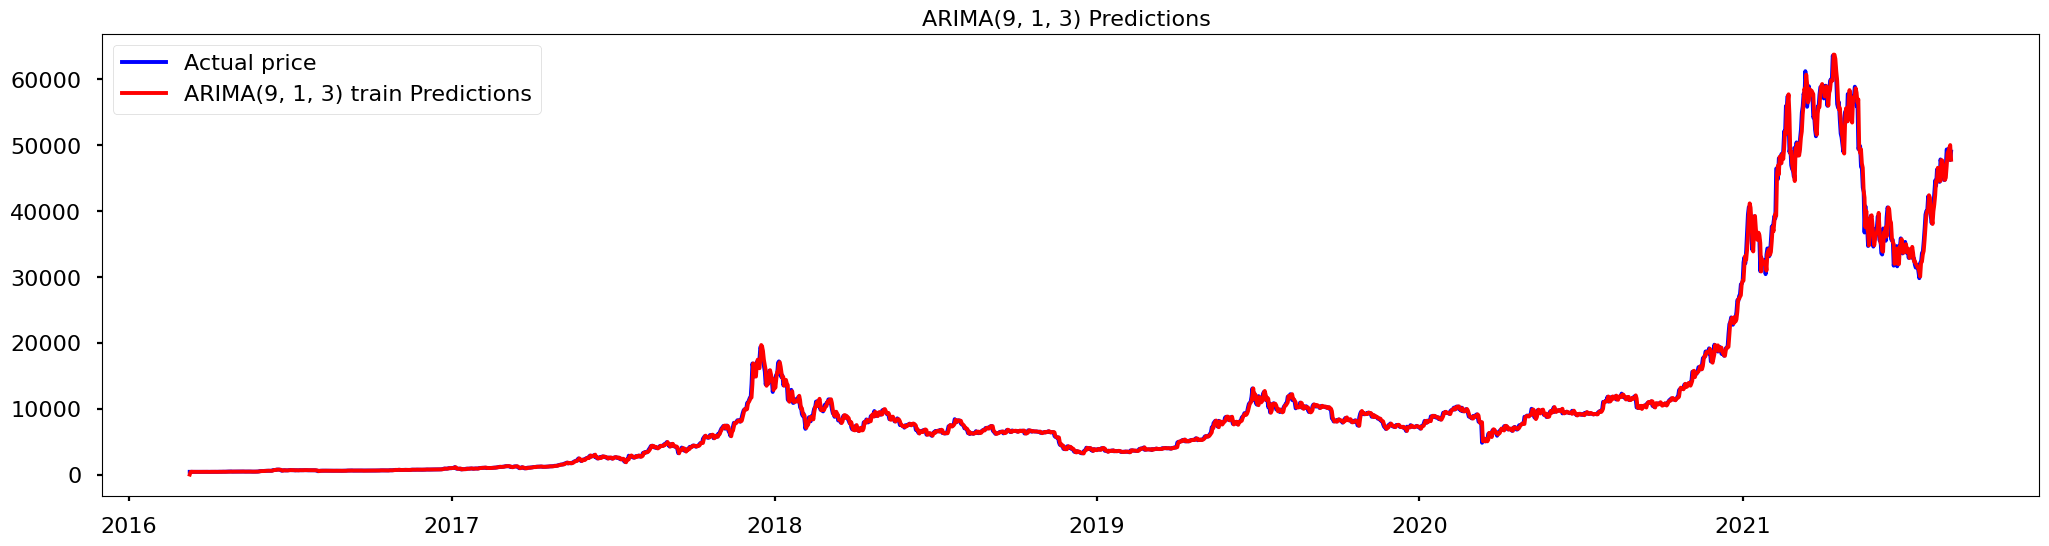

In [27]:
plt.rcParams["figure.figsize"] = 25, 6

# Defining the subplots
fig, ax = plt.subplots(1, 1)

# Actuals vs Predictions for ARIMA(9, 1, 4)
ax.plot(train, color = "blue", label = "Actual price")

ax.plot(train_pred, color = "red", label = "ARIMA(9, 1, 3) train Predictions")
ax.set_title(f"ARIMA(9, 1, 3) Predictions ", size = 16)
plt.legend()
# Displaying the plots
plt.show()

In [28]:
test

,BTC_close
Date,
2021-08-26,46831.6
2021-08-27,49064.3
2021-08-28,48897.1
2021-08-29,48777.4
2021-08-30,46992.7
...,...
2023-06-18,26339.7
2023-06-19,26845.9
2023-06-20,28307.7


In [29]:
start_index = len(train)
end_index = len(train)+len(test)-1
test_pred = model.predict(start=start_index, end=end_index)
test_pred

2021-08-26    48499.788867
2021-08-27    48333.473136
2021-08-28    48649.094332
2021-08-29    48993.842318
2021-08-30    48688.274501
                  ...     
2023-06-18    48653.564817
2023-06-19    48653.369110
2023-06-20    48653.338882
2023-06-21    48653.516483
2023-06-22    48653.626950
Freq: D, Name: predicted_mean, Length: 666, dtype: float64

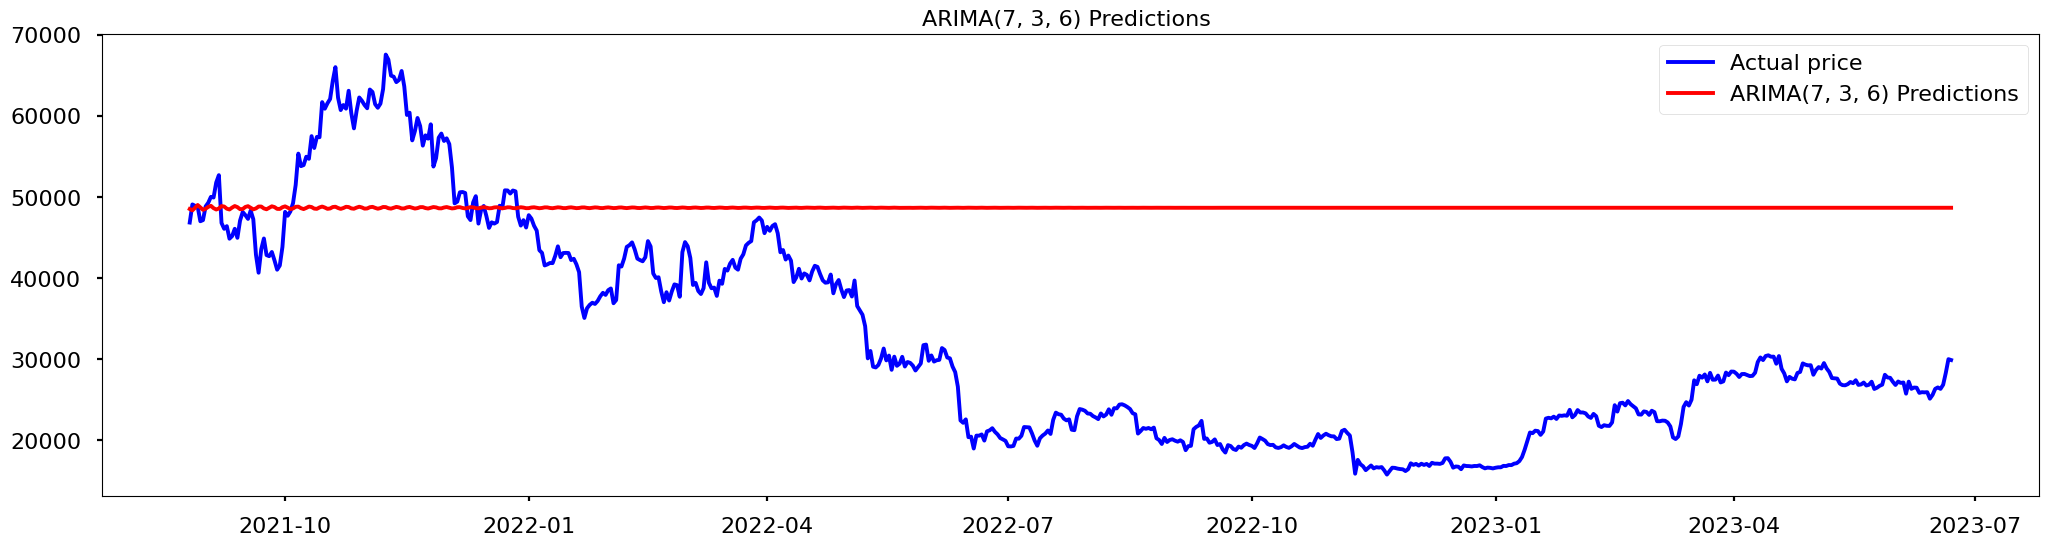

In [30]:
plt.rcParams["figure.figsize"] = 25, 6

# Defining the subplots
fig, ax = plt.subplots(1, 1)

# Actuals vs Predictions for ARIMA(9, 1, 4)
ax.plot(test, color = "blue", label = "Actual price")

ax.plot(test_pred, color = "red", label = "ARIMA(7, 3, 6) Predictions")
ax.set_title(f"ARIMA(7, 3, 6) Predictions ", size = 16)
plt.legend()
# Displaying the plots
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
print("Test accuracy for train set")
#RMSE train accuracy
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(train, train_pred)))

#MAPE train accuracy
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(train,train_pred))
print("R2 score:", r2_score(train,train_pred))
print("Test accuracy for test set")

#RMSE test accuracy
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(test, test_pred)))
#MAPE test accuracy
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(test, test_pred))
print("R2 score:", r2_score(test,test_pred))


Test accuracy for train set
Root Mean Square Error (RMSE): 733.2737903558343
Mean Absolute Percentage Error (MAPE): 0.02809960822590971
R2 score: 0.997028565192846
Test accuracy for test set
Root Mean Square Error (RMSE): 21103.8951464649
Mean Absolute Percentage Error (MAPE): 0.7971688441356211
R2 score: -1.5391027277600489
